<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Covid_in_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('WHO-COVID-19-global-data.csv')

In [5]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
df.isnull().sum()

Date_reported           0
Country_code         1294
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.head(2)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0


In [9]:
df['Date_reported']=pd.to_datetime(df['Date_reported'])

In [11]:
df.sort_values('Date_reported',inplace=True)

In [12]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
50466,2020-01-03,CF,Central African Republic,AFRO,0,0,0,0
153986,2020-01-03,LY,Libya,EMRO,0,0,0,0
130694,2020-01-03,IM,Isle of Man,EURO,0,0,0,0
199276,2020-01-03,MP,Northern Mariana Islands (Commonwealth of the),WPRO,0,0,0,0


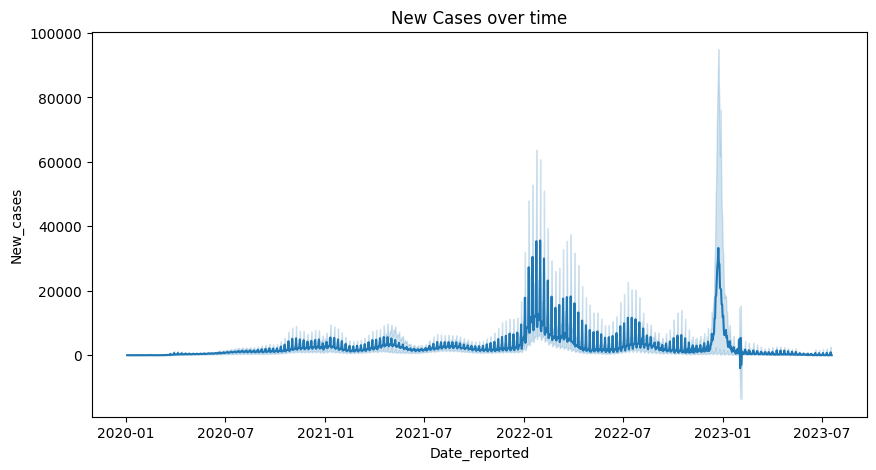

In [14]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x='Date_reported',y='New_cases',data=df)
plt.title('New Cases over time')
plt.show()

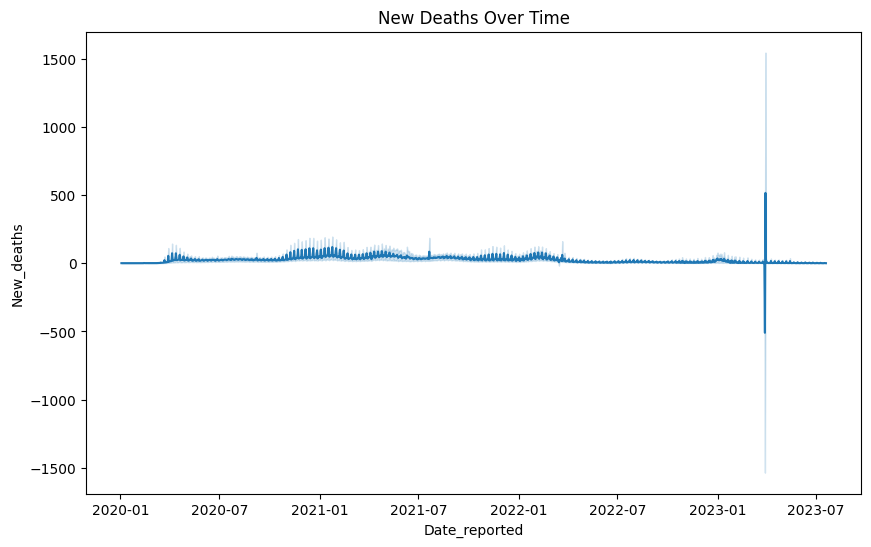

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Date_reported',y='New_deaths',data=df)
plt.title('New Deaths Over Time')
plt.show()

In [19]:
df['New_cases'].describe()

count    3.053840e+05
mean     2.515082e+03
std      4.051447e+04
min     -1.105466e+06
25%      0.000000e+00
50%      1.000000e+00
75%      1.930000e+02
max      6.966046e+06
Name: New_cases, dtype: float64

In [20]:
df['New_deaths'].describe()

count    305384.000000
mean         22.750305
std         345.251288
min     -120896.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      120896.000000
Name: New_deaths, dtype: float64

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

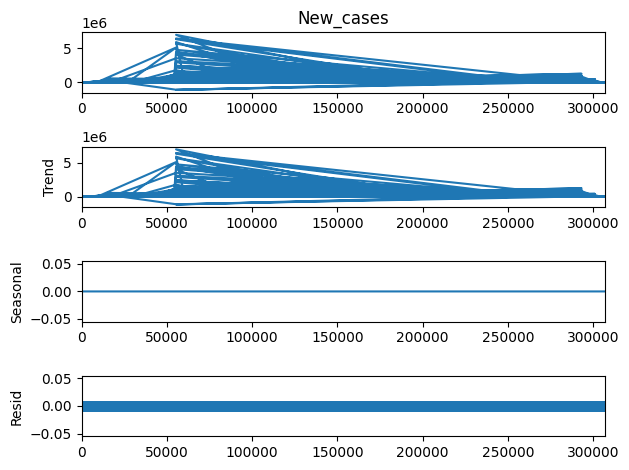

In [22]:
result=seasonal_decompose(df['New_cases'],model='additive',period=1)
result.plot()
plt.show()

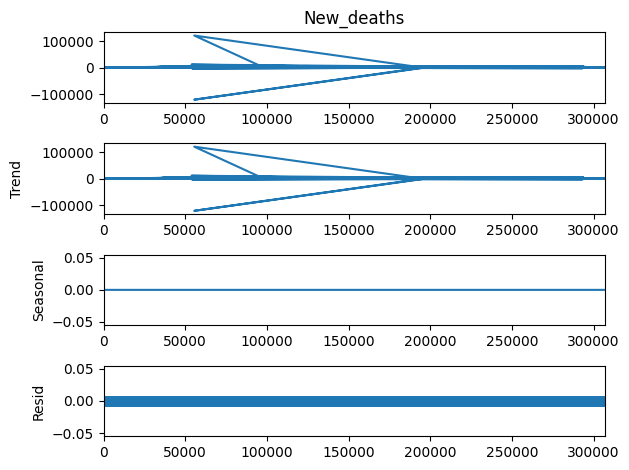

In [23]:
result=seasonal_decompose(df['New_deaths'],model='additive',period=1)
result.plot()
plt.show()

In [24]:
df['New_cases_lag1']=df['New_cases'].shift(1)
df['New_cases_lag2']=df['New_cases'].shift(2)
df['New_cases_lag3']=df['New_cases'].shift(3)

In [25]:
df['New_deaths_lag1']=df['New_deaths'].shift(1)
df['New_deaths_lag2']=df['New_deaths'].shift(2)
df['New_deaths_lag3']=df['New_deaths'].shift(3)

In [26]:
df.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,New_cases_lag1,New_cases_lag2,New_cases_lag3,New_deaths_lag1,New_deaths_lag2,New_deaths_lag3
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50466,2020-01-03,CF,Central African Republic,AFRO,0,0,0,0,0.0,NaN,NaN,0.0,NaN,NaN
153986,2020-01-03,LY,Libya,EMRO,0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN
130694,2020-01-03,IM,Isle of Man,EURO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
199276,2020-01-03,MP,Northern Mariana Islands (Commonwealth of the),WPRO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.dropna(inplace=True)

In [28]:
df.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,New_cases_lag1,New_cases_lag2,New_cases_lag3,New_deaths_lag1,New_deaths_lag2,New_deaths_lag3
130694,2020-01-03,IM,Isle of Man,EURO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
199276,2020-01-03,MP,Northern Mariana Islands (Commonwealth of the),WPRO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
51760,2020-01-03,TD,Chad,AFRO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
117754,2020-01-03,HT,Haiti,AMRO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
197982,2020-01-03,MK,North Macedonia,EURO,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
train_data=df['New_cases'][:-30]
test_data=df['New_cases'][-30:]

In [30]:
model=ARIMA(df['New_cases'],order=(5,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              New_cases   No. Observations:               305381
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -3696153.210
Date:                Sun, 23 Jul 2023   AIC                        7392318.419
Time:                        05:39:37   BIC                        7392382.195
Sample:                             0   HQIC                       7392336.851
                             - 305381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8342      0.000  -8245.856      0.000      -0.834      -0.834
ar.L2         -0.6681      0.000  -5231.460      0.000      -0.668      -0.668
ar.L3         -0.5022      0.000  -3715.783      0.0

In [32]:
start_index=len(train_data)
end_index=len(train_data)+len(test_data)-1
forecast=model_fit.predict(start=start_index,end=end_index)

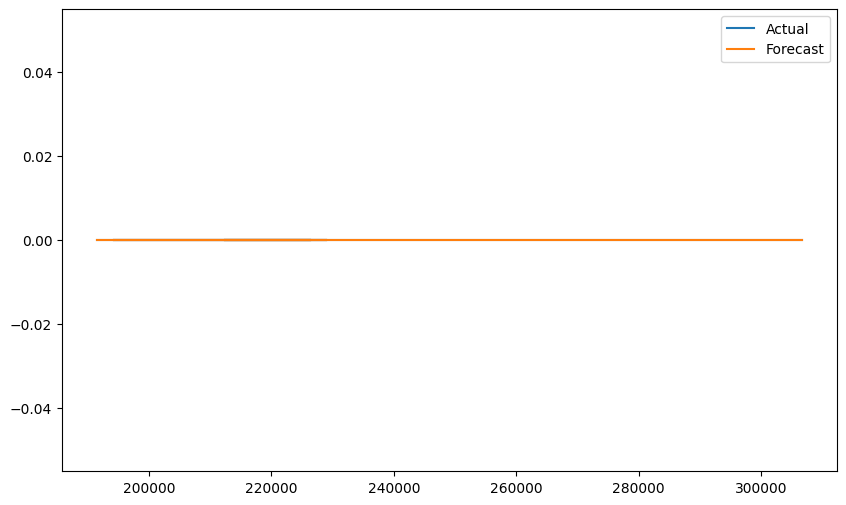

In [33]:
plt.figure(figsize=(10,6))
plt.plot(test_data.index,test_data.values,label='Actual')
plt.plot(test_data.index,forecast,label='Forecast')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
mae=mean_absolute_error(test_data,forecast)
rmse=np.sqrt(mean_squared_error(test_data,forecast))

In [37]:
print(f'Mean Absolute Error (MAE):{mae}')
print(f'Root Mean Squared Error(RMAE):{rmse}')

Mean Absolute Error (MAE):6.9423659e-316
Root Mean Squared Error(RMAE):0.0


In [39]:
import itertools
import warnings

In [40]:
# Convert the index to DatetimeIndex
df.index = pd.to_datetime(df.index)

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Specify to ignore warning messages
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# Grid Search to find the optimal parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(df['New_cases'],
                                                  order=param,
                                                  seasonal_order=param_seasonal,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAXNonexNone12 model - AIC:inf


In [41]:
import statsmodels.api as sm

In [42]:
# Fit the optimal model
optimal_model = sm.tsa.statespace.SARIMAX(df['New_cases'],
                                          order=best_pdq,
                                          seasonal_order=best_seasonal_pdq,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
optimal_results = optimal_model.fit()

In [43]:
pred_uc = optimal_results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

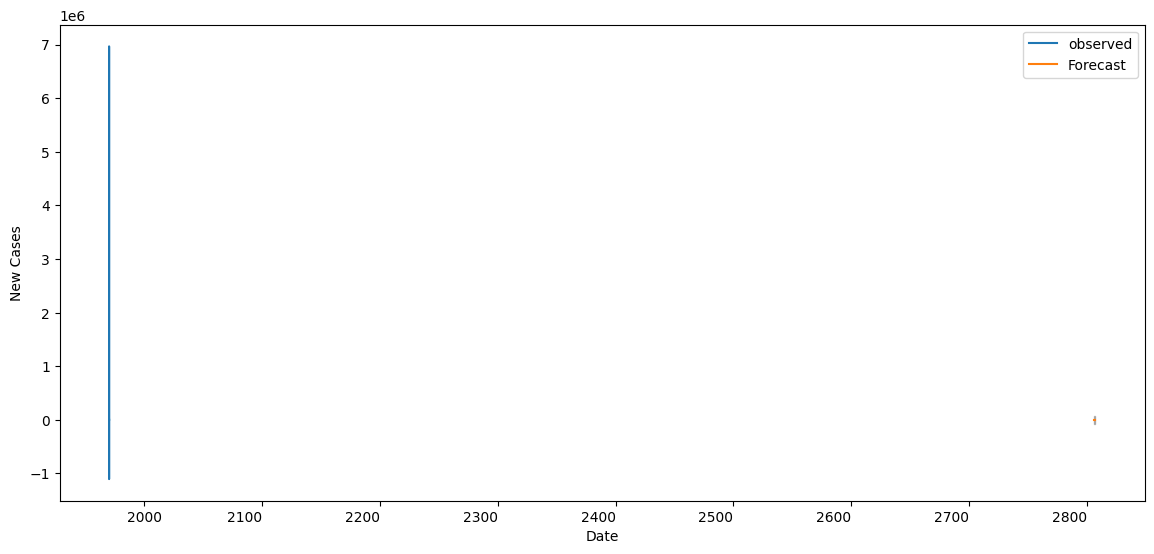

In [44]:
ax = df['New_cases'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')

plt.legend()
plt.show()

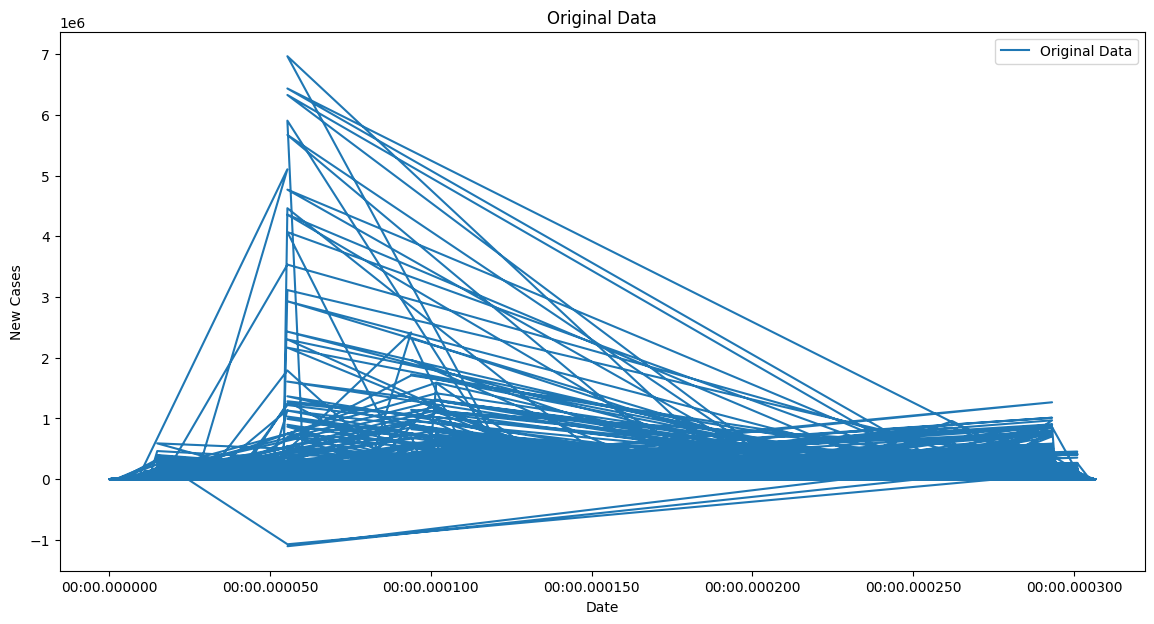

In [45]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['New_cases'], label='Original Data')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

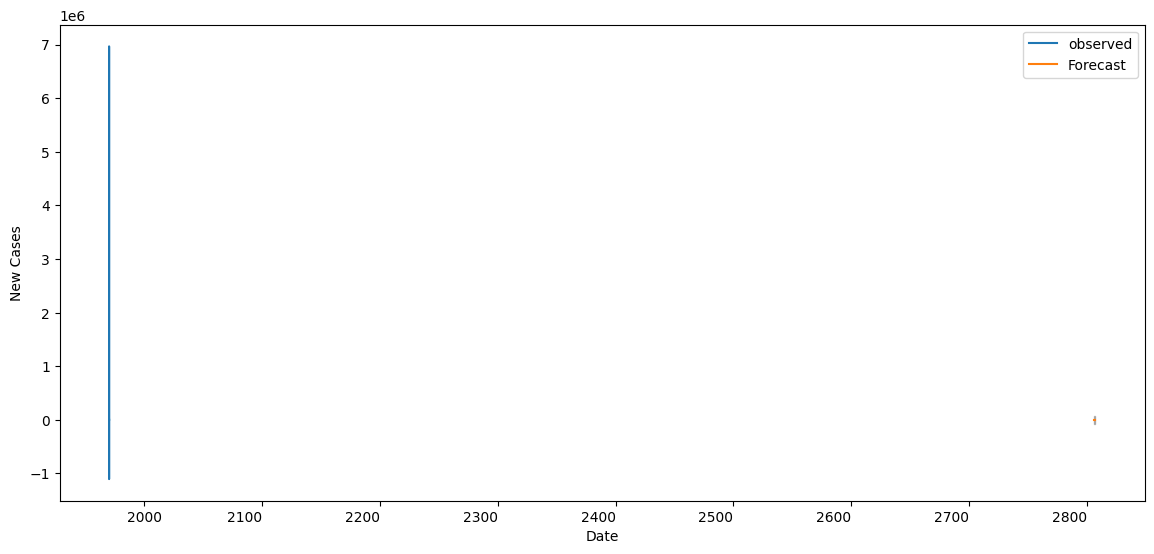

In [46]:
# Get forecast 500 steps ahead in future
pred_uc = optimal_results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# Plot the real and forecasted values
ax = df['New_cases'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')

plt.legend()
plt.show()